# Gathering Data

In [1]:
from pandas import read_csv

In [2]:
url = 'https://raw.githubusercontent.com/achmatim/data-mining/main/Dataset/iris.csv'
df = read_csv(url)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Preparing Data

In [3]:
X = df.values[:, :-1]
y = df.values[:, -1]

X[0:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]], dtype=object)

In [4]:
X = X.astype('float32')
X[0:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]], dtype=float32)

In [5]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Split Data menjadi training dan testing dataset

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Ukuran x train :', X_train.shape)
print('Ukuran y train :', y_train.shape)
print()
print('Ukuran x test :', X_test.shape)
print('Ukuran y test :', y_test.shape)

Ukuran x train : (120, 4)
Ukuran y train : (120,)

Ukuran x test : (30, 4)
Ukuran y test : (30,)


# Deep Learning Model Life-Cycle

Define Model

In [8]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import Dense

DEFINE MODEL SEQUENTIAL API 1

In [9]:
model = Sequential([
    Input(shape=(4,)),
    Dense(3, activation='relu'),
    Dense(3, activation='relu'),
    Dense(3, activation='softmax'),
], name='Sequential_API_1')

DEFINE MODEL SEQUENTIAL API 2

In [11]:
model = Sequential(name='Sequential_API_2')
model.add(Input(shape=(4,)))  # Pass the shape as a tuple (4,)
model.add(Dense(3, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(3, activation='softmax'))

DEFINE MODEL FUNCTIONAL API

In [12]:
input_layer = Input(shape=(4,))
hid_layer_1 = Dense(3, activation='relu')(input_layer)
hid_layer_2 = Dense(3, activation='relu')(hid_layer_1)
output_layer = Dense(3, activation='softmax')(hid_layer_2)

model = Model(inputs=input_layer, outputs=output_layer, name='Functional_API')

Model Text Decsription

In [13]:
model.summary()

Model: "Functional_API"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 3)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39 (156.00 B)

 Trainable params: 39 (156.00 B)

 Non-trainable params: 0 (0.00 B)

Model Architecture Plot

In [14]:
from tensorflow.keras.utils import plot_model

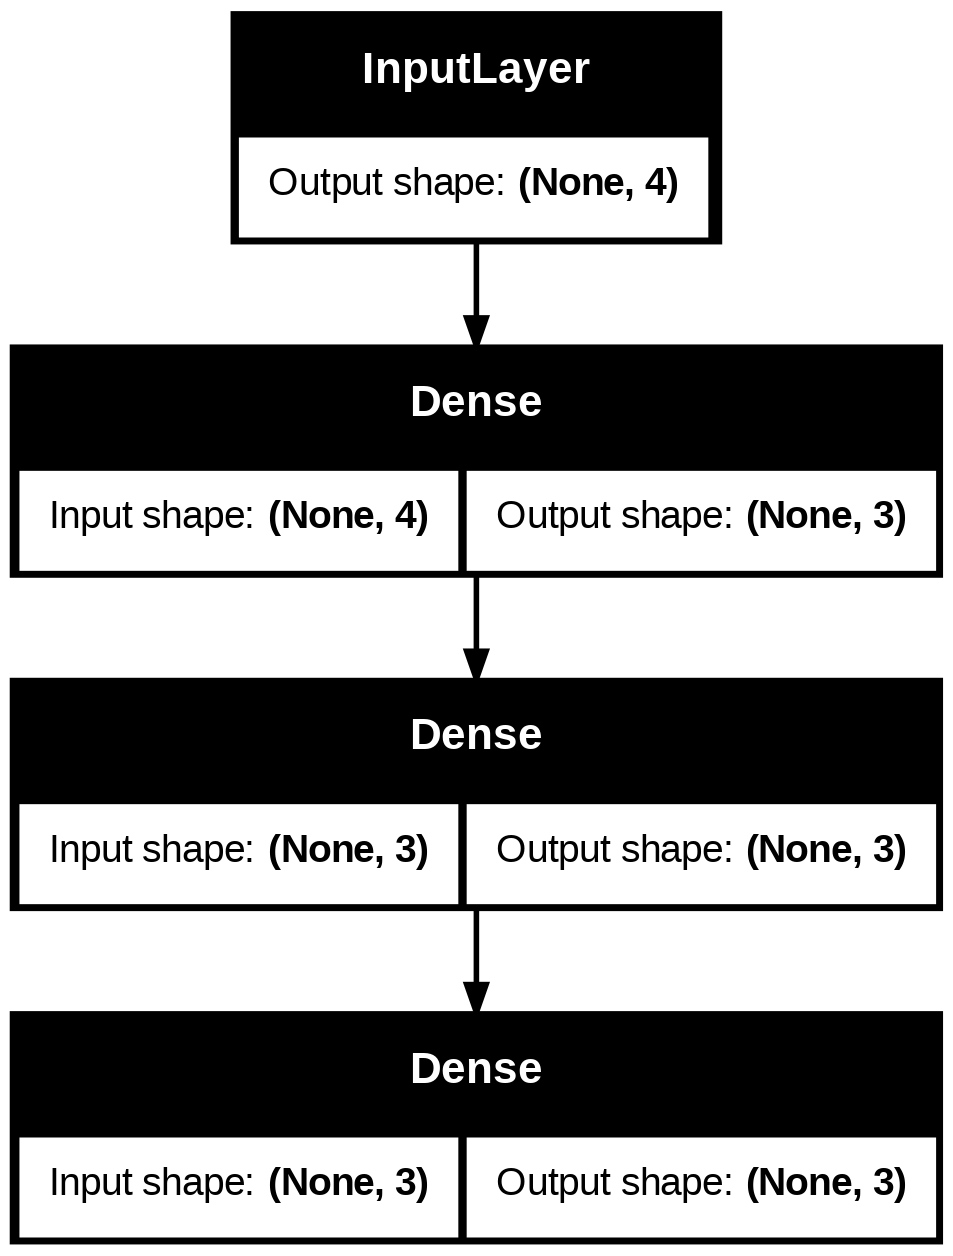

In [15]:
plot_model(model, 'model.png', show_shapes=True)

Compile model

In [16]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [17]:
model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss = SparseCategoricalCrossentropy(),
    metrics =['Accuracy']
)

In [22]:
history = model.fit(
    x = X_train,
    y = y_train,
    validation_data = (X_test, y_test),
    batch_size = 32,
    epochs = 200,
    verbose = 2
)


Epoch 1/200
4/4 - 0s - 57ms/step - Accuracy: 0.9333 - loss: 0.4551 - val_Accuracy: 0.9333 - val_loss: 0.4424
Epoch 2/200
4/4 - 0s - 47ms/step - Accuracy: 0.9250 - loss: 0.4528 - val_Accuracy: 0.9333 - val_loss: 0.4403
Epoch 3/200
4/4 - 0s - 13ms/step - Accuracy: 0.9250 - loss: 0.4508 - val_Accuracy: 0.9333 - val_loss: 0.4381
Epoch 4/200
4/4 - 0s - 19ms/step - Accuracy: 0.9250 - loss: 0.4489 - val_Accuracy: 0.9333 - val_loss: 0.4361
Epoch 5/200
4/4 - 0s - 13ms/step - Accuracy: 0.9250 - loss: 0.4467 - val_Accuracy: 0.9333 - val_loss: 0.4341
Epoch 6/200
4/4 - 0s - 13ms/step - Accuracy: 0.9417 - loss: 0.4447 - val_Accuracy: 0.9333 - val_loss: 0.4322
Epoch 7/200
4/4 - 0s - 14ms/step - Accuracy: 0.9417 - loss: 0.4427 - val_Accuracy: 0.9333 - val_loss: 0.4303
Epoch 8/200
4/4 - 0s - 13ms/step - Accuracy: 0.9417 - loss: 0.4408 - val_Accuracy: 0.9333 - val_loss: 0.4283
Epoch 9/200
4/4 - 0s - 13ms/step - Accuracy: 0.9500 - loss: 0.4387 - val_Accuracy: 0.9333 - val_loss: 0.4265
Epoch 10/200
4/4 - 

Ploting learning curves

In [23]:
from matplotlib import pyplot

In [32]:
model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss = SparseCategoricalCrossentropy(),
    metrics =['Accuracy']
)

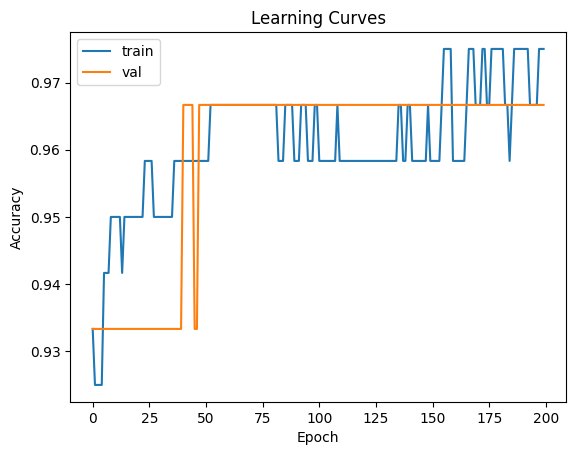

In [31]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.plot(history.history['Accuracy'], label='train')
pyplot.plot(history.history['val_Accuracy'], label='val')
pyplot.legend()
pyplot.show()

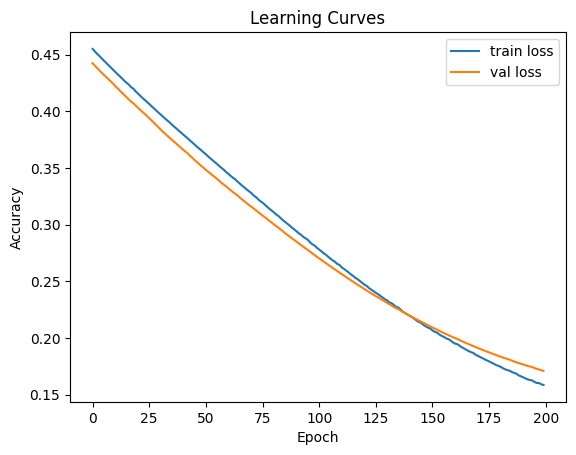

In [37]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.plot(history.history['loss'], label='train loss')
pyplot.plot(history.history['val_loss'], label='val loss')
pyplot.legend()
pyplot.show()

Evaluasi Model

In [38]:
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy: {acc}')

1/1 - 0s - 275ms/step - Accuracy: 0.9667 - loss: 0.1710
Test Accuracy: 0.9666666388511658


Bangun prediction

In [41]:
from numpy import argmax, array

In [53]:
#input data baru
new_sepal_length = float(input('Input Sepal Length :'))
new_sepal_width = float(input('Input Sepal width :'))
new_petal_length = float(input('Input Petal Length :'))
new_petal_width = float(input('Input Pepal Length :'))

new_data = [new_sepal_length, new_sepal_width, new_petal_length, new_petal_width]

# Reshape new_data into a 2D array with a single row
new_data_reshaped = array([new_data])

#prediksi data baru lalu cari classnya
y_pred = model.predict(new_data_reshaped)
y_class = argmax(y_pred)

#cetak hasil prediksi
print(f'\nHasil Prediksi:{y_pred} (class={y_class}) \n')

if y_class == 0:
  print('Iris Setosa')
elif y_class == 1:
  print('Iris Versicolor')
elif y_class == 2:
  print('Iris Virginica')

Input Sepal Length :1
Input Sepal width :2
Input Petal Length :1
Input Pepal Length :1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

Hasil Prediksi:[[0.8048433  0.19201677 0.00314003]] (class=0) 

Iris Setosa


Simpan Model

In [54]:
model.save('model.h5')

Load Model

In [55]:
import numpy as np

In [56]:
from tensorflow.keras.models import load_model

In [58]:
model = load_model('model.h5')

new_data = [5.1, 3.5, 1.4, 0.2]
new_data = np.array(new_data).reshape(1,-1)
y_pred = model.predict(new_data)
print('\nPredicted:{} (class={})'.format(y_pred, np.argmax(y_pred)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

Predicted:[[9.8597276e-01 1.4026961e-02 2.4971456e-07]] (class=0)


# DL Techniques

Dropout

In [59]:
from tensorflow.keras.layers import Dropout

In [60]:
model = Sequential(name='Dropout_Example')
model.add(Dense(100, input_shape=(10,)))
model.add(Dense(80))
model.add(Dropout(0.5)) #dropout 50% neuron dari hiden layer 2
model.add(Dense(30))
model.add(Dropout(0.4)) #dropout 40% neuron dari hiden layer 3
model.add(Dense(10))
model.add(Dropout(0.2)) #dropout 20% neuron dari hiden layer 4
model.add(Dense(5))
model.add(Dense(1))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Dropout_Example"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 100)                 │           1,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 80)                  │           8,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 30)                  │           2,430 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,981 (46.80 KB)

 Trainable params: 11,981 (46.80 KB)

 Non-trainable params: 0 (0.00 B)

Batch Normalization

In [61]:
from tensorflow.keras.layers import BatchNormalization

In [62]:
model = Sequential(name='Batch_Normalization_Example')
model.add(Dense(100, input_shape=(10,)))
model.add(BatchNormalization())
model.add(Dense(80))
model.add(BatchNormalization())
model.add(Dense(30))
model.add(BatchNormalization())
model.add(Dense(10))
model.add(Dense(5))
model.add(Dense(1))

model.summary()

Model: "Batch_Normalization_Example"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 100)                 │           1,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 80)                  │           8,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 80)                  │             320 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 30)                  │           2,430 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 30)                  │             120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,821 (50.08 KB)

 Trainable params: 12,401 (48.44 KB)

 Non-trainable params: 420 (1.64 KB)